#**PROBLEMA DE NEGOCIO**


---




##Una cadena de Supermercados Online que opera en Brasil quiere obtener insights sobre la venta de sus productos. Para hacer esto, usted, como científico de datos, deberá analizar los pedidos de sus clientes y mostrar gráficamente las respuestas de las siguientes preguntas de negocio:

### **Preguntas**

1. ¿Cuáles son las ventas totales por año? ¿Y qué año tuvo mejor desempeño?

2. ¿Cuáles son los 7 productos que más ganancias mostraron durante todo el período?

3. Si separamos las ventas totales por año y por regiones ¿Qué insight podemos obtener de nuestras ventas?

4. ¿Cuál es el método de envío más utilizado por los clientes del Supermercado? ¿Es proporcional para B2B y B2C?

5. ¿Cuáles son las ventas totales por trimestre en el estado de São Paulo?

6. ¿Existe otro insight que puedas proporcionar?

#**1. Configuración del Ambiente**


---




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
global df_ventas, df_ventas_limpio
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***Verificación de la configuración del ambiente***

El primer comando,
**!pip show Matplotlib**, muestra información detallada sobre el paquete Matplotlib instalado en tu sistema. En particular, muestra el nombre del paquete, la versión, la ubicación de instalación, la descripción, el autor, la licencia, los paquetes requeridos y los paquetes que lo requieren.
El segundo comando, **grep 'Name\|Version'**, filtra la salida del primer comando y muestra solo las líneas que contienen las palabras “Name” o “Version”. En otras palabras, este comando extrae solo el nombre y la versión del paquete Matplotlib.

Por lo tanto, la expresión de código completa se utiliza para mostrar el nombre y la versión del paquete Matplotlib instalado en tu sistema.

In [ ]:
!python -V
print('------')
!pip show Pandas | grep 'Name\|Version'
print('------')
!pip show Matplotlib | grep 'Name\|Version'

Python 3.10.12
------
Name: pandas
Version: 1.5.3
------
Name: matplotlib
Version: 3.7.1


#**2. Obtención y Tratamiento de Datos**


---




In [ ]:
def obtencion_datos():
    # Cargar los datos del archivo CSV en un DataFrame
    global df_ventas, df_ventas_limpio
    df_ventas= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ProyectoSupermarketSales/reporte_ventas.csv", sep=",")
    #convertir fecha_pedido y fecha_envio a datetime en el formato solicitado
    df_ventas["fecha_pedido"]=pd.to_datetime(df_ventas["fecha_pedido"],format='%Y-%m-%d')
    df_ventas["fecha_envio"]=pd.to_datetime(df_ventas["fecha_envio"],format='%Y-%m-%d')
    #eliminar duplicados del df_ventas y asignar resultado a nuevo dataframe df_ventas_limpio:
    df_ventas_limpio = df_ventas.drop_duplicates()
    #Eliminar registros de prueba en la columna 'nombre_cliente'.
    filtro_prueba=df_ventas_limpio['nombre_cliente'] == 'prueba'
    df_ventas_limpio=df_ventas_limpio.drop(df_ventas_limpio[filtro_prueba].index)
    #Eliminar todos los registros cuyo valor sea nulo en la columna 'nombre_cliente'.
    df_ventas_limpio=df_ventas_limpio.dropna(subset=['nombre_cliente'])
    #Eliminar Operaciones sin ganancia:  sólo utilizaremos los registros que tengan un valor mayor a cero en la columna 'total_ganancia', según especificación del cliente.
    filtro_ganancia_negativa=df_ventas_limpio['total_ganancia'] <= 0
    df_ventas_limpio=df_ventas_limpio.drop(df_ventas_limpio[filtro_ganancia_negativa].index)
    #Actualizar el indice: Utilizando el método reset_index actualiza el índice del dataframe final df_ventas_limpio.
    df_ventas_limpio.reset_index(drop=True, inplace=True)



# 2.1 Desarrollo del EDA

In [ ]:
df_ventas = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ProyectoSupermarketSales/reporte_ventas.csv")
print('Información:')
print(df_ventas.info())
print('------------')
print('Duplicados:')
print(df_ventas.duplicated().sum())
print('------------')
print('Registros de prueba:')
print((df_ventas['nombre_cliente'] == 'prueba').sum())
print('------------')
print('Registros con ganancia<=0:')
print((df_ventas['total_ganancia'] <= 0).sum())

Información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8954 entries, 0 to 8953
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fecha_pedido           8954 non-null   object 
 1   fecha_envio            8954 non-null   object 
 2   modo_envio             8954 non-null   object 
 3   nombre_cliente         8952 non-null   object 
 4   segmento_cliente       8954 non-null   object 
 5   ciudad                 8954 non-null   object 
 6   estado                 8954 non-null   object 
 7   region                 8954 non-null   object 
 8   departamento_producto  8954 non-null   object 
 9   tipo_producto          8954 non-null   object 
 10  precio_base            8954 non-null   float64
 11  precio_unit_sin_desc   8954 non-null   float64
 12  descuento              8954 non-null   float64
 13  precio_unit_venta      8954 non-null   float64
 14  cantidad_pedido        8954 non-null   int6

**Iniciamos el tratamiento de los datos transformando las fechas que estan tipo object y las convertiremos a tipo Date.

In [ ]:
df_ventas["fecha_pedido"]=pd.to_datetime(df_ventas["fecha_pedido"],format='%Y-%m-%d')
df_ventas["fecha_envio"]=pd.to_datetime(df_ventas["fecha_envio"],format='%Y-%m-%d')

In [ ]:
#otra manera de hacerlo en una sola línea: # Convertir las columnas 'fecha1' y 'fecha2' a tipo datetime en una sola línea de código
#df[['fecha1', 'fecha2']] = df[['fecha1', 'fecha2']].apply(pd.to_datetime)#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8954 entries, 0 to 8953
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   fecha_pedido           8954 non-null   datetime64[ns]
 1   fecha_envio            8954 non-null   datetime64[ns]
 2   modo_envio             8954 non-null   object        
 3   nombre_cliente         8952 non-null   object        
 4   segmento_cliente       8954 non-null   object        
 5   ciudad                 8954 non-null   object        
 6   estado                 8954 non-null   object        
 7   region                 8954 non-null   object        
 8   departamento_producto  8954 non-null   object        
 9   tipo_producto          8954 non-null   object        
 10  precio_base            8954 non-null   float64       
 11  precio_unit_sin_desc   8954 non-null   float64       
 12  descuento              8954 non-null   float64       
 13  pre

In [ ]:
print(df_ventas.duplicated().sum())

15


In [ ]:
#Se eliminanlos duplicados de df_ventas y se asignan a nuevo dataframe df_ventas_limpio
df_ventas_limpio = df_ventas.drop_duplicates()
print(df_ventas_limpio.duplicated().sum())
print(df_ventas.duplicated().sum())

0
15


**Eliminando registros de prueba.
 Elimina todos los registros cuyo valor sea igual a 'prueba' en la columna 'nombre_cliente', continúa guardando el resultado en df_ventas_limpio.

In [ ]:
print((df_ventas_limpio['nombre_cliente'] == 'prueba').sum())

4


In [ ]:
filtro_prueba=df_ventas_limpio['nombre_cliente'] == 'prueba'

In [ ]:
df_ventas_limpio=df_ventas_limpio.drop(df_ventas_limpio[filtro_prueba].index)

In [ ]:
print((df_ventas_limpio['nombre_cliente'] == 'prueba').sum())
print((df_ventas['nombre_cliente'] == 'prueba').sum())

0
4


** Eliminar todos los registros cuyo valor sea nulo en la columna 'nombre_cliente' y guardando el resultado en df_ventas_limpio.

In [ ]:
df_ventas_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8935 entries, 0 to 8939
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   fecha_pedido           8935 non-null   datetime64[ns]
 1   fecha_envio            8935 non-null   datetime64[ns]
 2   modo_envio             8935 non-null   object        
 3   nombre_cliente         8933 non-null   object        
 4   segmento_cliente       8935 non-null   object        
 5   ciudad                 8935 non-null   object        
 6   estado                 8935 non-null   object        
 7   region                 8935 non-null   object        
 8   departamento_producto  8935 non-null   object        
 9   tipo_producto          8935 non-null   object        
 10  precio_base            8935 non-null   float64       
 11  precio_unit_sin_desc   8935 non-null   float64       
 12  descuento              8935 non-null   float64       
 13  pre

In [ ]:
df_ventas_limpio=df_ventas_limpio.dropna(subset=['nombre_cliente'])

In [ ]:
df_ventas_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8933 entries, 0 to 8939
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   fecha_pedido           8933 non-null   datetime64[ns]
 1   fecha_envio            8933 non-null   datetime64[ns]
 2   modo_envio             8933 non-null   object        
 3   nombre_cliente         8933 non-null   object        
 4   segmento_cliente       8933 non-null   object        
 5   ciudad                 8933 non-null   object        
 6   estado                 8933 non-null   object        
 7   region                 8933 non-null   object        
 8   departamento_producto  8933 non-null   object        
 9   tipo_producto          8933 non-null   object        
 10  precio_base            8933 non-null   float64       
 11  precio_unit_sin_desc   8933 non-null   float64       
 12  descuento              8933 non-null   float64       
 13  pre

**Filtrar operaciones sin ganancia:  se informa que sólo utilizaremos los registros que tengan un valor mayor a cero en la columna 'total_ganancia', según especificación del cliente.

In [ ]:
print('Registros con ganancia<=0:')
print((df_ventas_limpio['total_ganancia'] <= 0).sum())

Registros con ganancia<=0:
1723


In [ ]:
filtro_ganancia_negativa=df_ventas_limpio['total_ganancia'] <= 0

**Totalizando la ganancia negativa antes de eliminar los registros**

In [ ]:
df_filtrado_ganancia_negativa=df_ventas_limpio[filtro_ganancia_negativa]
df_filtrado_ganancia_negativa.reset_index(drop=True, inplace=True)

In [ ]:
#Valor total de las ganancias menores e iguales a cero, de los 1723 registros.
total_ganancia_negativa=df_filtrado_ganancia_negativa["total_ganancia"].sum()
print(total_ganancia_negativa)

-242725.95


In [ ]:
df_ventas_limpio=df_ventas_limpio.drop(df_ventas_limpio[filtro_ganancia_negativa].index)

In [ ]:
print('Registros con ganancia<=0:')
print((df_ventas_limpio['total_ganancia'] <= 0).sum())

Registros con ganancia<=0:
0


In [ ]:
df_ventas_limpio.tail(10)

,fecha_pedido,fecha_envio,modo_envio,nombre_cliente,segmento_cliente,ciudad,estado,region,departamento_producto,tipo_producto,precio_base,precio_unit_sin_desc,descuento,precio_unit_venta,cantidad_pedido,total_venta,total_ganancia
7200,2022-08-04,2022-08-07,Envío rápido,João Pedro Silveira,B2C,Osasco,São Paulo,Sureste,Productos de Limpieza,Toallitas desinfectantes,9.41,12.48,0.1,11.23,5,56.15,9.10
7201,2021-09-23,2021-09-29,Entrega estándar,Fernando da Cunha,B2C,Crato,Ceará,Noreste,Productos de Limpieza,Bolsas de basura,13.21,17.27,0.0,17.27,7,120.89,28.42
7202,2021-09-23,2021-09-29,Entrega estándar,Fernando da Cunha,B2C,Crato,Ceará,Noreste,Electrónicos,Cámaras digitales,143.24,166.56,0.0,166.56,2,333.12,46.64
7203,2020-05-18,2020-05-24,Entrega estándar,Alexandre Barbosa,B2C,Natal,Rio Grande do Norte,Noreste,Productos de Limpieza,Toallitas desinfectantes,8.14,10.71,0.0,10.71,10,107.10,25.70
7204,2020-05-18,2020-05-24,Entrega estándar,Alexandre Barbosa,B2C,Natal,Rio Grande do Norte,Noreste,Productos de Limpieza,Detergente para platos,40.41,47.26,0.0,47.26,4,189.04,27.40
7205,2021-09-30,2021-10-04,Entrega estándar,Enrique Santos,B2C,Rio de Janeiro,Rio de Janeiro,Sureste,Electrónicos,Smartphones,97.34,123.22,0.0,123.22,1,123.22,25.88
7206,2022-11-18,2022-11-22,Entrega estándar,Heitor Silveira,B2B,Jequié,Bahia,Noreste,Electrónicos,Smartphones,223.01,271.97,0.0,271.97,1,271.97,48.96
7207,2022-11-18,2022-11-22,Entrega estándar,Heitor Silveira,B2B,Jequié,Bahia,Noreste,Electrónicos,Cámaras digitales,121.23,140.15,0.0,140.15,5,700.75,94.60
7208,2019-01-22,2019-01-24,Económico,Isabel Araújo,B2C,João Pessoa,Paraíba,Noreste,Ropa,Vestidos,26.29,31.79,0.1,28.61,3,85.83,6.96
7209,2022-05-05,2022-05-10,Económico,Esther Rodrigues,B2C,Mossoró,Rio Grande do Norte,Noreste,Productos de Limpieza,Ambientador en spray,351.36,413.37,0.0,413.37,2,826.74,124.02


**Actualizar el indice: Utilizando el método reset_index actualiza el índice del dataframe final df_ventas_limpio.

In [ ]:
df_ventas_limpio.reset_index(drop=True, inplace=True)

In [ ]:
df_ventas_limpio

,fecha_pedido,fecha_envio,modo_envio,nombre_cliente,segmento_cliente,ciudad,estado,region,departamento_producto,tipo_producto,precio_base,precio_unit_sin_desc,descuento,precio_unit_venta,cantidad_pedido,total_venta,total_ganancia
0,2021-11-09,2021-11-12,Económico,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sureste,Ropa,Camisetas,409.70,445.33,0.0,445.33,2,890.66,71.26
1,2021-11-09,2021-11-12,Económico,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sureste,Ropa,Jeans,705.10,829.53,0.0,829.53,3,2488.59,373.29
2,2021-06-13,2021-06-17,Económico,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sureste,Productos de Limpieza,Toallitas desinfectantes,19.02,24.86,0.0,24.86,2,49.72,11.68
3,2020-10-12,2020-10-19,Entrega estándar,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sur,Productos de Limpieza,Papel higiénico,35.88,42.24,0.1,38.02,2,76.04,4.28
4,2019-06-10,2019-06-15,Entrega estándar,Sophia Dias,B2C,Rio de Janeiro,Rio de Janeiro,Sureste,Ropa,Vestidos,20.29,23.73,0.0,23.73,7,166.11,24.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7205,2021-09-30,2021-10-04,Entrega estándar,Enrique Santos,B2C,Rio de Janeiro,Rio de Janeiro,Sureste,Electrónicos,Smartphones,97.34,123.22,0.0,123.22,1,123.22,25.88
7206,2022-11-18,2022-11-22,Entrega estándar,Heitor Silveira,B2B,Jequié,Bahia,Noreste,Electrónicos,Smartphones,223.01,271.97,0.0,271.97,1,271.97,48.96
7207,2022-11-18,2022-11-22,Entrega estándar,Heitor Silveira,B2B,Jequié,Bahia,Noreste,Electrónicos,Cámaras digitales,121.23,140.15,0.0,140.15,5,700.75,94.60
7208,2019-01-22,2019-01-24,Económico,Isabel Araújo,B2C,João Pessoa,Paraíba,Noreste,Ropa,Vestidos,26.29,31.79,0.1,28.61,3,85.83,6.96


**Dataframe final con la limpieza ejecutada al 100% segun las especificaciones.

In [ ]:
df_ventas_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7210 entries, 0 to 7209
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   fecha_pedido           7210 non-null   datetime64[ns]
 1   fecha_envio            7210 non-null   datetime64[ns]
 2   modo_envio             7210 non-null   object        
 3   nombre_cliente         7210 non-null   object        
 4   segmento_cliente       7210 non-null   object        
 5   ciudad                 7210 non-null   object        
 6   estado                 7210 non-null   object        
 7   region                 7210 non-null   object        
 8   departamento_producto  7210 non-null   object        
 9   tipo_producto          7210 non-null   object        
 10  precio_base            7210 non-null   float64       
 11  precio_unit_sin_desc   7210 non-null   float64       
 12  descuento              7210 non-null   float64       
 13  pre

In [ ]:
total_ganancias_positivas=df_ventas_limpio["total_ganancia"].sum()
print((total_ganancias_positivas).round(2))


454244.35


In [ ]:
#Calculando el % de ganancia negativa sobre el total de ganancias en valores absolutos
#-242725.95
print(abs((((total_ganancia_negativa/(total_ganancias_positivas))*100).round(2))))

53.44


# 2.2 Ejecutando limpieza(verificación) con la funcion Obtencion_datos

In [ ]:
#Ejecutando limpieza
obtencion_datos()
print('Información:')
print(df_ventas_limpio.info())
print('------------')
print('Duplicados:')
print(df_ventas_limpio.duplicated().sum())
print('------------')
print('Registros de prueba:')
print((df_ventas_limpio['nombre_cliente'] == 'prueba').sum())
print('------------')
print('Registros con ganancia<=0:')
print((df_ventas_limpio['total_ganancia'] <= 0).sum())

Información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7210 entries, 0 to 7209
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   fecha_pedido           7210 non-null   datetime64[ns]
 1   fecha_envio            7210 non-null   datetime64[ns]
 2   modo_envio             7210 non-null   object        
 3   nombre_cliente         7210 non-null   object        
 4   segmento_cliente       7210 non-null   object        
 5   ciudad                 7210 non-null   object        
 6   estado                 7210 non-null   object        
 7   region                 7210 non-null   object        
 8   departamento_producto  7210 non-null   object        
 9   tipo_producto          7210 non-null   object        
 10  precio_base            7210 non-null   float64       
 11  precio_unit_sin_desc   7210 non-null   float64       
 12  descuento              7210 non-null   float64   

#**3. Preguntas y respuestas**


---




#**Pregunta 1: ¿Cuáles son las ventas totales por año? ¿Y qué año tuvo mejor desempeño?**

## 1. Preparación de datos

In [ ]:
def pregunta_1():
  global df_ventas, df_ventas_limpio, df_ventas_año
#Crea una copia de la base df_ventas_limpio en un nuevo dataframe df_ventas_año y guarda unicamente las columnas 'fecha_pedido'y total_venta'.
  df_ventas_año=df_ventas_limpio
  df_ventas_año=df_ventas_limpio[["fecha_pedido","total_venta"]]
#crear nueva columna de nombre Año(en posición posterior a fecha_pedido) y extraer en ella el año de fecha_pedido.
  df_ventas_año.insert(1,"Año",df_ventas_año["fecha_pedido"].dt.year)
#Eliminar columna fecha_pedido del df_ventas_año:
  df_ventas_año=df_ventas_año.drop(columns=["fecha_pedido"])
#Agrupar año y suma de total_ventas(por año)
  df_ventas_año = df_ventas_año.groupby('Año').agg({'total_venta': 'sum'}).reset_index()

## 1.1 Desarrollo de la preparación de datos para Ventas por año

In [ ]:
df_ventas_año.insert(1,"Año",df_ventas_año["fecha_pedido"].dt.year)
#otra manera
#df_ventas_año.loc[:, 'Año'] = df_ventas_año.loc[:, 'fecha_pedido'].dt.year

In [ ]:
df_ventas_año.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7210 entries, 0 to 7209
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   fecha_pedido  7210 non-null   datetime64[ns]
 1   Año           7210 non-null   int64         
 2   total_venta   7210 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 169.1 KB


In [ ]:
df_ventas_año.head()

,fecha_pedido,Año,total_venta
0,2021-11-09,2021,890.66
1,2021-11-09,2021,2488.59
2,2021-06-13,2021,49.72
3,2020-10-12,2020,76.04
4,2019-06-10,2019,166.11


In [ ]:
df_ventas_año=df_ventas_año.drop(columns=["fecha_pedido"])

In [ ]:
df_ventas_año.tail()

,Año,total_venta
7205,2021,123.22
7206,2022,271.97
7207,2022,700.75
7208,2019,85.83
7209,2022,826.74


In [ ]:
df_ventas_año.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7210 entries, 0 to 7209
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Año          7210 non-null   int64  
 1   total_venta  7210 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 112.8 KB


In [ ]:
#Se realiza agrupación por la columna año y sumariza los valores de 'total_venta', para esto necesitarás usar los métodos groupby y aggregate respectivamente, guarda este resultado en df_ventas_año.
#df_ventas_año = df_ventas_año.groupby('Año').agg({'total_venta': 'sum'})
#df_ventas_año = df_ventas_año.groupby('Año').total_venta.agg("sum")
df_ventas_año = df_ventas_año.groupby('Año').agg({'total_venta': 'sum'}).reset_index()
#df_ventas_año.columns = ['año', 'total_ventas']

## 1.1.1 Mostrar resumen de tabla de ventas por año

In [ ]:
pregunta_1()
df_ventas_año.head()

,Año,total_venta
0,2019,1052735.86
1,2020,1190541.40
2,2021,1535801.44
3,2022,1825927.50


## 1.2 Visualización:


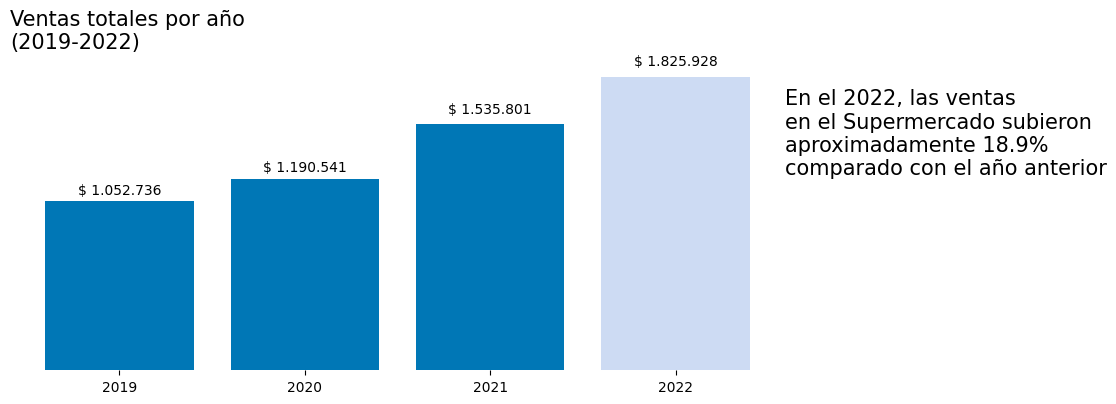

In [ ]:
#Creando figura y un eje
fig, ax = plt.subplots(figsize=(10,4))
#insertar titulo y configuración de posición
ax.set_title("Ventas totales por año\n(2019-2022)", fontsize=15, pad=10, loc="left")
#lista de colores de barras verticales
colores=['#0077b6','#0077b6','#0077b6','#CDDBF3']
#crear lista de año para etiquetas de las barras independiente del numero de registros del dataframe
año_barra=[]
for año in range(len(df_ventas_año)):
  año_barra.append(df_ventas_año['Año'][año])
#graficando las barras y su configuración
ax.bar(df_ventas_año["Año"], df_ventas_año["total_venta"], color=colores, width=0.8, align="center", tick_label = año_barra)
#Eliminar la visualización del eje en Y
ax.get_yaxis().set_visible(False)
#Eliminar la visualización del marco del gráfico
ax.set_frame_on(False)
#Colocar los valores sobre cada barra :
for bar in ax.patches:
  valor = bar.get_height()
  qtd = "$ {:,.0f}".format(valor).replace(',', '.')  #valor convertido a texto y expresado en miles cons eparador tipo punto.
  ax.text(bar.get_x()+bar.get_width()/2.0,valor+valor*0.04,qtd, ha="center")
#Cálculo de porcentaje de incremento interanual 2021-2022
ventas_2021=df_ventas_año.loc[df_ventas_año["Año"]==2021,"total_venta"].values[0]
ventas_2022=df_ventas_año.loc[df_ventas_año["Año"]==2022,"total_venta"].values[0]
porcentaje_incremento = ((ventas_2022 - ventas_2021)*100 / ventas_2021).round(1)
analisis="En el 2022, las ventas \nen el Supermercado subieron\naproximadamente {0}%\ncomparado con el año anterior".format(porcentaje_incremento)
fig.text(.9,.6, analisis , fontsize = 15)
plt.show()

# Pregunta 2: ¿Cuáles son los 7 productos que más ganancias mostraron durante todo el período?

## 2.1 Preparación de datos

In [ ]:
def pregunta_2():
  global  df_ventas, df_ventas_limpio, df_top_ganancias
#Crea una copia de la base
  df_top_ganancias= df_ventas_limpio
#Crear nuevo dataframe con solo dos columnas de tipo_producto y total_ganancia
  df_top_ganancias= df_ventas_limpio[["tipo_producto","total_ganancia"]]
#Agrupar por tipo de producto y ordenar nuevo dataframe en forma descendente(mayor a menor)
  df_top_ganancias=df_top_ganancias.groupby("tipo_producto").agg({"total_ganancia":"sum"}).reset_index(). sort_values(by="total_ganancia", ascending=False)
#Actualizar nuevo dataframe(top_ganancias) con los 7 registros de mayor valor en total_ganancia
  df_top_ganancias = df_top_ganancias.nlargest(7, 'total_ganancia')
#Reacomodando el dataframe para graficar
  df_top_ganancias = df_top_ganancias.sort_values(by="total_ganancia", ascending=True)
#convirtiendo la vista de numero con separador de miles
#  return print(df_top_ganancias.head(100))

## 2.1.1 Desarrollo de top 7 productos con mayor ventas

In [ ]:
df_top_ganancias= df_ventas_limpio
df_top_ganancias= df_ventas_limpio[["tipo_producto","total_ganancia"]]
df_top_ganancias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7210 entries, 0 to 7209
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tipo_producto   7210 non-null   object 
 1   total_ganancia  7210 non-null   float64
dtypes: float64(1), object(1)
memory usage: 112.8+ KB


In [ ]:
df_top_ganancias=df_top_ganancias.groupby("tipo_producto").agg({"total_ganancia":"sum"}).reset_index(). sort_values(by="total_ganancia", ascending=False)
df_top_ganancias.head(20)

,tipo_producto,total_ganancia
11,Lámparas LED,111453.41
8,Laptops,91148.67
4,Cámaras digitales,80192.63
13,Smartphones,64705.58
7,Jeans,55982.95
6,Detergente para ropas,55766.39
1,Bolsas de basura,53328.46
12,Papel higiénico,43546.05
0,Ambientador en spray,40976.16
15,Vestidos,29784.63


In [ ]:
df_top_ganancias = df_top_ganancias.nlargest(7, 'total_ganancia')
df_top_ganancias.head(20)

,tipo_producto,total_ganancia
11,Lámparas LED,111453.41
8,Laptops,91148.67
4,Cámaras digitales,80192.63
13,Smartphones,64705.58
7,Jeans,55982.95
6,Detergente para ropas,55766.39
1,Bolsas de basura,53328.46


In [ ]:
#reordenando para efectos de visualización
df_top_ganancias = df_top_ganancias.sort_values(by="total_ganancia", ascending=True)
df_top_ganancias.head(10)

,tipo_producto,total_ganancia
1,Bolsas de basura,53328.46
6,Detergente para ropas,55766.39
7,Jeans,55982.95
13,Smartphones,64705.58
4,Cámaras digitales,80192.63
8,Laptops,91148.67
11,Lámparas LED,111453.41


## 2.1.2 Resumen tabla de top de productos con mayor ventas

In [ ]:
pregunta_2()
df_top_ganancias.head(10)

,tipo_producto,total_ganancia
1,Bolsas de basura,53328.46
6,Detergente para ropas,55766.39
7,Jeans,55982.95
13,Smartphones,64705.58
4,Cámaras digitales,80192.63
8,Laptops,91148.67
11,Lámparas LED,111453.41


## 2.1.3 Cálculo de "Ganancias totales" por departamento de "Productos de Limpieza", de los dos productos con mayores ganancias.

In [ ]:
def preg2_ganancia_departamento_limpieza():
  global  df_ventas, df_ventas_limpio, df_top_ganancias_departamento
#Crea una copia de la base
  df_top_ganancias_departamento= df_ventas_limpio
#Crear nuevo dataframe con solo dos columnas de tipo_producto y total_ganancia
  df_top_ganancias_departamento = df_ventas_limpio[["departamento_producto","tipo_producto","total_ganancia"]]
#Agrupar por tipo de producto y ordenar nuevo dataframe en forma descendente(mayor a menor)
  df_top_ganancias_departamento=df_top_ganancias_departamento.groupby(["departamento_producto","tipo_producto"])["total_ganancia"].sum().reset_index(). sort_values(by="total_ganancia", ascending=False)
# Seleccionar las 7 filas con los valores más altos
  df_top_ganancias_departamento = df_top_ganancias_departamento.head(7)
#Crear un filtro por departamento"Productos de Limpieza
  filtro_limpieza=df_top_ganancias_departamento['departamento_producto'] == 'Productos de Limpieza'
#Totalizar las ganancias de los mejores dos(2) productos en el departamento "Productos de Limpieza"
  total_limpieza=df_top_ganancias_departamento[filtro_limpieza]["total_ganancia"].sum()
#Convertir a entero
  total_limpieza=int(total_limpieza)
#Dividir entre mil para visualizar numero con menos ocupación de espacio
  total_limpieza=total_limpieza/1000

In [ ]:
preg2_ganancia_departamento_limpieza()
df_top_ganancias_departamento.head(100)

In [ ]:
total_limpieza

109.094

## 2.2 Visualización

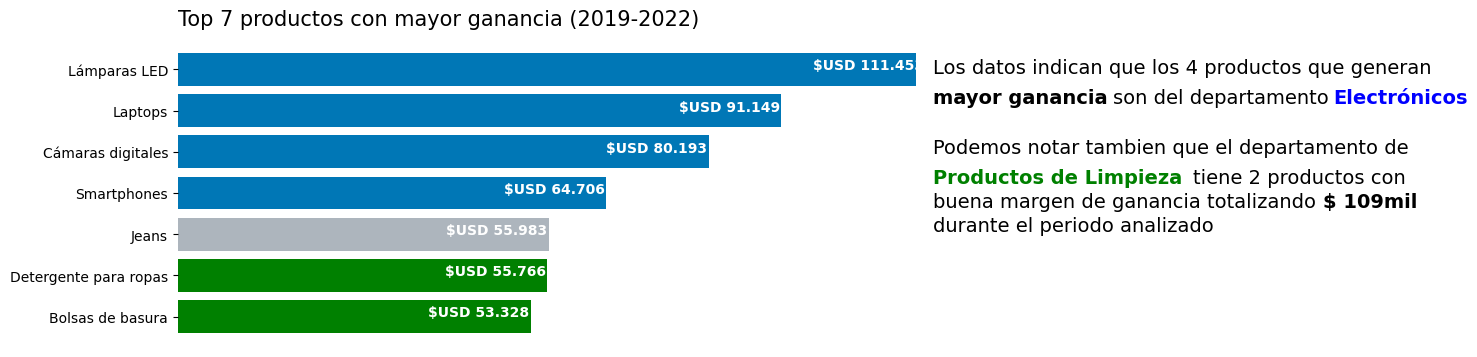

In [ ]:
from IPython.utils.text import string
fig, ax = plt.subplots(figsize=(10,4))
colores=['g','g','#adb5bd','#0077b6','#0077b6','#0077b6','#0077b6']
#Crear el gráfico de barras horizontal :
ax.barh(df_top_ganancias["tipo_producto"],df_top_ganancias["total_ganancia"] , color=colores, align='center')
#Eliminar la visualización del eje en X
ax.get_xaxis().set_visible(False)
#Eliminar la visualización del marco del gráfico
ax.set_frame_on(False)
ax.set_title("Top 7 productos con mayor ganancia (2019-2022)", fontsize=15, pad=10, loc="left")
for i,valor in enumerate(df_top_ganancias['total_ganancia']):
  qtd = "$USD {:,.0f}".format(valor).replace(",",".")
  ax.text(valor-15.5e3,i,qtd, color="w",fontweight="bold")
analisis_top7 ="Los datos indican que los 4 productos que generan\n"
fig.text(0.88,.74, analisis_top7 , fontsize = 14)
fig.text(0.88,.72,"mayor ganancia",color="k", fontweight="bold", fontsize=14)
fig.text(1.06,.72, "son del departamento" , fontsize = 14)
fig.text(1.28,.61, "Electrónicos\n\n" , fontsize = 14, color="b",fontweight="bold")
fig.text(.88,0.54, "Podemos notar tambien que el departamento de\n",fontsize = 14)
fig.text(.88,0.52, "Productos de Limpieza", fontsize = 14, color="g",fontweight="bold")
fig.text(1.14,0.52, "tiene 2 productos con", fontsize = 14)
fig.text(0.88,0.46, "buena margen de ganancia totalizando",fontsize = 14)
fig.text(1.27,0.46, "$ {:.0f}mil".format(total_limpieza), fontsize = 14,fontweight="bold")
fig.text(0.88,0.40, "durante el periodo analizado", fontsize = 14)
plt.show()

# Pregunta 3: Si separamos las ventas totales por año y por regiones ¿Qué insight podemos obtener de nuestras ventas?

## 3.1 Preparación de datos

In [ ]:
def pregunta_3():
  global  df_ventas, df_ventas_limpio, df_ventas_año_region
#Crea una copia de la base
  df_ventas_año_region= df_ventas_limpio
#Crea nuevo dataframe ventas_año_region con tres columnas : fecha_pedido, region y total_venta
  df_ventas_año_region=df_ventas_año_region[['fecha_pedido','region','total_venta']]
#Crear columna con sólo el año de fecha_pedido
  df_ventas_año_region.insert(1,"año",df_ventas_año_region["fecha_pedido"].dt.year)
#Borrar fecha_pedido y definir el nuevo dataframe ventas_año_region con las columnas año, region y total_venta
  df_ventas_año_region= df_ventas_año_region.drop(columns=["fecha_pedido"])
#Crear tabla cruzada con información agrupada de ventas totales por año y por mes
  df_ventas_año_region= pd.crosstab(index = df_ventas_año_region["año"], columns = df_ventas_año_region["region"], values = df_ventas_año_region["total_venta"], aggfunc="sum")
#Ordenar el dataframe por mayor ventas
  df_ventas_año_region = df_ventas_año_region[df_ventas_año_region.sum().sort_values(ascending=False).index]
#Dividir df_ventas_año_región entre 1000
  df_ventas_año_region= df_ventas_año_region/1000
  return print(df_ventas_año_region.head())

## 3.1.1 Desarrollo de ventas totales por año y regiones

In [ ]:
#Crea una copia de la base
df_ventas_año_region= df_ventas_limpio
df_ventas_año_region=df_ventas_año_region[['fecha_pedido','region','total_venta']]
df_ventas_año_region.info()

In [ ]:
df_ventas_año_region.head()

,fecha_pedido,region,total_venta
0,2021-11-09,Sureste,890.66
1,2021-11-09,Sureste,2488.59
2,2021-06-13,Sureste,49.72
3,2020-10-12,Sur,76.04
4,2019-06-10,Sureste,166.11


In [ ]:
df_ventas_año_region.insert(1,"año",df_ventas_año_region["fecha_pedido"].dt.year)
df_ventas_año_region.head()

,fecha_pedido,año,region,total_venta
0,2021-11-09,2021,Sureste,890.66
1,2021-11-09,2021,Sureste,2488.59
2,2021-06-13,2021,Sureste,49.72
3,2020-10-12,2020,Sur,76.04
4,2019-06-10,2019,Sureste,166.11


In [ ]:
df_ventas_año_region= df_ventas_año_region.drop(columns=["fecha_pedido"])
df_ventas_año_region.head()

,año,region,total_venta
0,2021,Sureste,890.66
1,2021,Sureste,2488.59
2,2021,Sureste,49.72
3,2020,Sur,76.04
4,2019,Sureste,166.11


In [ ]:
#Crear tabla cruzada con información agrupada de total de ventas por año y region
#indice: Utiliza la columna año de df_ventas_año_region
#columna: Utiliza la columna region de df_ventas_año_region
#total: Utiliza la columna total_venta de df_ventas_año_region
#Guarda el resultado en df_ventas_año_region.
df_ventas_año_region= pd.crosstab(index = df_ventas_año_region["año"], columns = df_ventas_año_region["region"], values = df_ventas_año_region["total_venta"], aggfunc="sum")

In [ ]:
df_ventas_año_region.head()

region,Centro-Oeste,Noreste,Norte,Sur,Sureste
año,,,,,
2019,67406.37,346407.40,71778.74,44189.84,522953.51
2020,90616.80,282431.39,107309.38,61451.04,648732.79
2021,125344.52,359829.92,69534.02,110198.47,870894.51
2022,97679.64,549254.20,99195.86,99393.36,980404.44


## 3.1.2 Resumen de tabla cruzada totales de ventas por año y región

In [ ]:
pregunta_3()

region    Sureste    Noreste  Centro-Oeste      Norte        Sur
año                                                             
2019    522.95351  346.40740      67.40637   71.77874   44.18984
2020    648.73279  282.43139      90.61680  107.30938   61.45104
2021    870.89451  359.82992     125.34452   69.53402  110.19847
2022    980.40444  549.25420      97.67964   99.19586   99.39336


In [ ]:
df_ventas_año_region.head()

region,Sureste,Noreste,Centro-Oeste,Norte,Sur
año,,,,,
2019,522.95351,346.40740,67.40637,71.77874,44.18984
2020,648.73279,282.43139,90.61680,107.30938,61.45104
2021,870.89451,359.82992,125.34452,69.53402,110.19847
2022,980.40444,549.25420,97.67964,99.19586,99.39336


## 3.2 Visualización

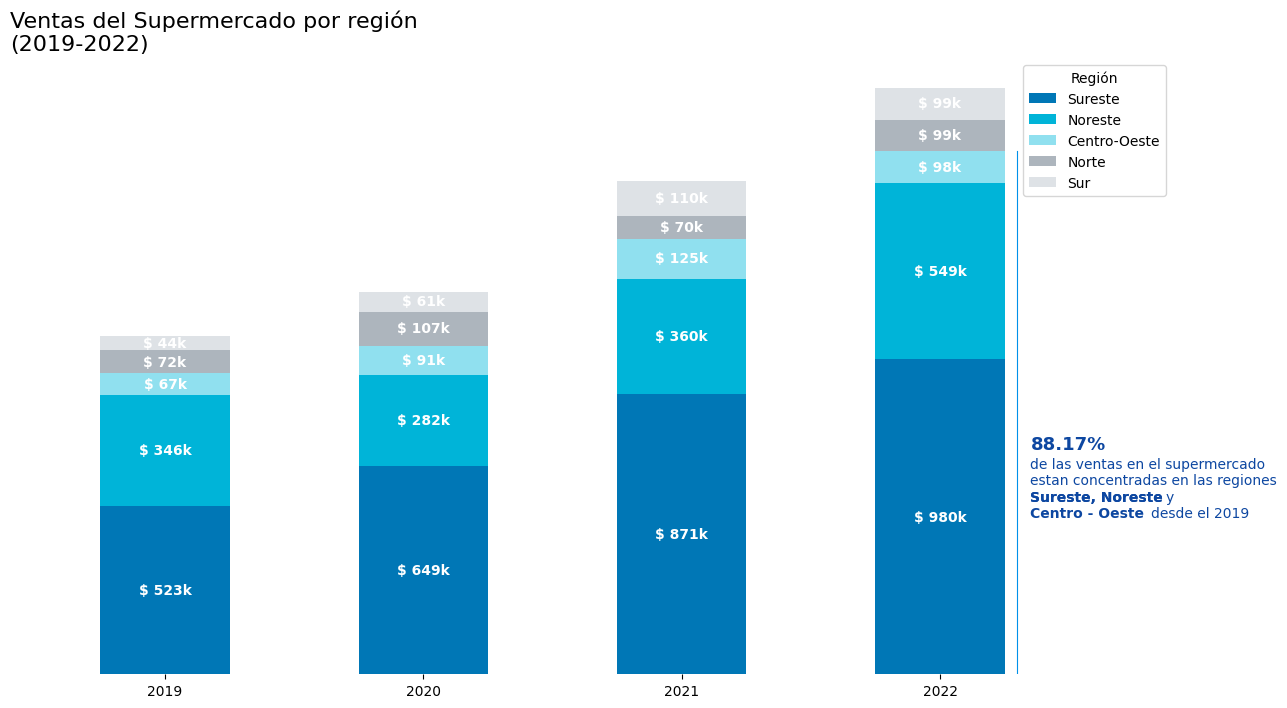

In [ ]:
#crear el gráfico de columnas apiladas :
colores=['#0077b6', '#00b4d8', '#90e0ef', '#adb5bd', '#dee2e6']
bar_width = 0.5
bar_space = 0.1
ax = df_ventas_año_region.plot( kind='bar', stacked=True, figsize=(15,8), color=colores, width = bar_width)

#Espacio entre las barras
ax.set_xlim(-bar_space - 0.5,4-0.1)

#Colocar valores sobre cada segmento:
for container in ax.containers:
  labels = ['$ {0:.0f}k'.format(valor) for valor in container.datavalues] #Convertir a texto y adicionar símbolo de $ al inicio
  ax.bar_label(container, label_type='center', labels=labels, color="w", fontweight="bold")
#set de la etiqueta de año en cada barra y colocar de manera horizontal
ax.set_xticklabels(df_ventas_año_region.index, rotation=0)
#Agregar título al grafico
ax.set_title('Ventas del Supermercado por región\n(2019-2022)', fontsize=16, loc="left")
#Eliminar la visualización del eje en Y
ax.get_yaxis().set_visible(False)
#Eliminar la visualización del marco del gráfico
ax.set_frame_on(False)
# Quitar palabra año del eje x, originaria de la columna año del dataframe
ax.set_xlabel(None)
#Editar la legenda cambiando el título y fijando una posición
ax.legend(loc='upper right', title="Región")
# Agregar una línea vertical
ax.axvline(x=bar_width * 6.6, ymax=0.849, color='#0091EA', linestyle='-', linewidth=0.8, label='Línea Vertical')

#CALCULO DE PORCENTAJE TOTAL DE LAS REGIONES DEL OESTE
#Primero sumamos cada region durante los años y ese total luego los sumamos para tener un valor total durante 2019-2022
sumatoria_total = df_ventas_año_region.sum().sum()
#Suma las regions Sureste, Noreste y Centro-Oeste
#Primero creamos la serie con la sumatoria por region durante 2019-2022
#Luego seleccionamos de la serie los valores que queremos sumar
sumatoria_regiones = df_ventas_año_region.sum()
sumatoria_regiones = sumatoria_regiones[['Sureste', 'Noreste', 'Centro-Oeste']].sum()
#promedio
prom = (sumatoria_regiones * 100)/sumatoria_total
#Insertar comentarios de análisis
 #Posicionamiento del texto
  #{:.2f} indica que vamos a tomar dos valores decimales despues del punto
ax.text(bar_width * 6.7, 700, '{:.2f}%'.format(prom), fontweight='bold', color="#0D47A1", fontsize = 13)
ax.text(bar_width * 6.7, 590, 'de las ventas en el supermercado \nestan concentradas en las regiones', color="#0D47A1", fontsize = 10)
ax.text(bar_width * 6.7, 540, 'Sureste, Noreste', color="#0D47A1", fontsize = 10, fontweight='bold')
ax.text(bar_width * 6.7, 540, 'Sureste, Noreste', color="#0D47A1", fontsize = 10, fontweight='bold')
ax.text(bar_width * 7.75, 540, 'y', color="#0D47A1", fontsize = 10)
ax.text(bar_width * 6.7, 490, 'Centro - Oeste', color="#0D47A1", fontsize = 10, fontweight='bold')
ax.text(bar_width * 7.63, 490, 'desde el 2019', color="#0D47A1", fontsize = 10,)

plt.show()


#**Pregunta 4: ¿Cuál es el método de envío más utilizado por los clientes del Supermercado? ¿Es proporcional para B2B y B2C?**

## 4.1 Preparación de datos

In [ ]:
def pregunta_4():
  global  df_ventas, df_ventas_limpio, df_modo_envio
#Crea una copia de la base
  df_modo_envio = df_ventas_limpio
#Crea nuevo dataframe df_modo_envio con tres columnas : modo_envio, segmento_cliente
  df_modo_envio=df_modo_envio[['modo_envio','segmento_cliente']]
#Crear tabla cruzada con información agrupada de modo de envio por segmento de cliente
  df_modo_envio= pd.crosstab(index = df_modo_envio["modo_envio"], columns = df_modo_envio["segmento_cliente"]).sort_values("B2B")
  return print(df_modo_envio.head())

##4.1.1 Desarrollo del método de envío mas utilizado

***Se realizó la misma metodología que la pregunta 3***

##4.1.2Resumen de tabla cruzada de metodos de envío por segmento de cliente

In [ ]:
pregunta_4()

segmento_cliente   B2B   B2C
modo_envio                  
24 horas           171   231
Envío rápido       543   542
Económico          707   755
Entrega estándar  2048  2213


In [ ]:
df_modo_envio.head()

segmento_cliente,B2B,B2C
modo_envio,,
24 horas,171,231
Envío rápido,543,542
Económico,707,755
Entrega estándar,2048,2213


##4.2 Visualización

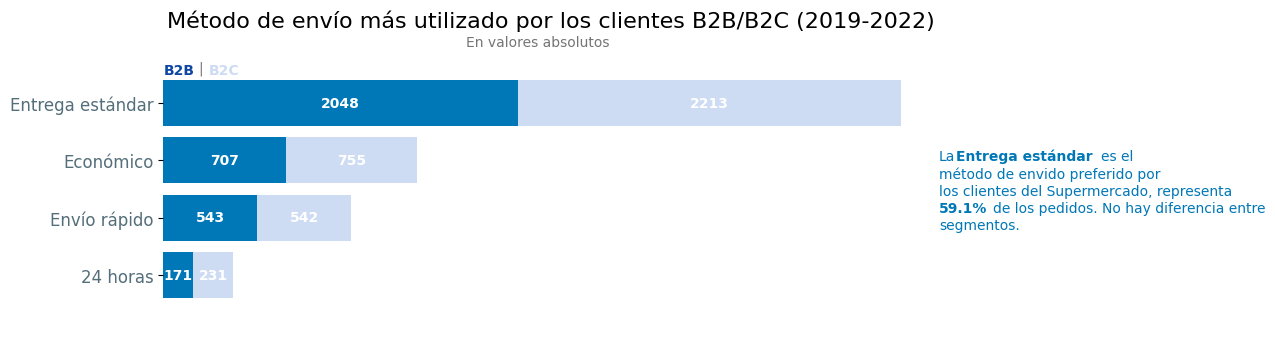

In [ ]:
#Crea una figura y un eje :
fig, ax = plt.subplots(figsize=(10,4))
#crear lista de colores
colores=['#0077b6','#CDDBF3']
#Para crear el gráfico de cada barra horizontal:
ax.barh(df_modo_envio.index, df_modo_envio['B2B'], color=colores[0])
ax.barh(df_modo_envio.index, df_modo_envio['B2C'], left=df_modo_envio['B2B'], color=colores[1])
#Donde:
#ejeX: es la columna del dataframe que irá en el eje X.
#eje1Y:  df_modo_envio['B2B'].
#eje2Y:  df_modo_envio['B2C'].
#colores: es una lista con 2 colores, uno por cada barra.
for container in ax.containers:
  labels = ['{0:.0f}'.format(valor) for valor in container.datavalues] #Convertir a texto
  ax.bar_label(container, label_type='center', labels=labels, color="w", fontweight="bold")

# for container in ax.containers: recorre cada segmento(container) encontrado en el gráfico.
# labels: lista con 4 valores, uno por cada modo de envío.
# ax.bar_label: coloca la lista de texto en segmento(container) actual.

#Eliminacion de textos eje x otra opción
# ax.set_xticks([])
# ax.set_xticklabels([])


# #Eliminar la visualización del marco del gráfico y del eje en X
ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)
#Cambio de color a las etiquetas de modo de envío
ax.tick_params(axis='y', labelcolor = '#546E7A', labelsize=12)


#Espacio entre las barras
space = 0.6
plt.ylim(min(plt.ylim()[0] - space, 0), plt.ylim()[1] + space)

#Textos arriba gráfico
ax.text(0, 3.5, 'B2B', color="#0D47A1", fontsize = 10, fontweight='bold')
ax.text(200, 3.55, '|', color="#757575", fontsize = 10)
ax.text(260, 3.5, 'B2C', color="#CDDBF3", fontsize = 10, fontweight='bold')

#Agregar título al grafico
ax.set_title('Método de envío más utilizado por los clientes B2B/B2C (2019-2022)', fontsize=16)
#Subtitulo
ax.text(50 * 35, 4, 'En valores absolutos', color="#757575", fontsize = 10)



#Calculo del porcentaje al que equivale el total de compras con entrega estandar
total_envios = df_modo_envio.sum().sum()
#.loc accedemos a las columnas por la etiqueta entrega estándar y sumamos sus contenidos
total_estandar = df_modo_envio.loc['Entrega estándar'].sum()

porcentaje_estandar= (total_estandar * 100)/total_envios


#   #Texto del Análisis en el gráfico
ax.text(max(plt.xlim()), 2, 'La', color="#0077b6", fontsize = 10)
ax.text(max(plt.xlim()) + 100, 2, 'Entrega estándar', color="#0077b6", fontsize = 10, fontweight='bold')
ax.text(max(plt.xlim()) * 1.21, 2, 'es el', color="#0077b6", fontsize = 10)
ax.text(max(plt.xlim()) + 5, 1.4, 'método de envido preferido por \nlos clientes del Supermercado, representa ', color="#0077b6", fontsize = 10)
ax.text(max(plt.xlim()) + 5, 1.1, '{:.1f}%'.format(porcentaje_estandar), color="#0077b6", fontsize = 10, fontweight = 'bold')
ax.text(max(plt.xlim()) * 1.07, 1.1, 'de los pedidos. No hay diferencia entre', color="#0077b6", fontsize = 10)
ax.text(max(plt.xlim()) + 5, 0.8, 'segmentos.', color="#0077b6", fontsize = 10)


plt.show()



#**Pregunta 5: ¿Cuáles son las ventas totales por trimestre en el estado de São Paulo?**

## 5.1 Preparación de datos

In [ ]:
def pregunta_5():
  global  df_ventas, df_ventas_limpio, df_ventas_sp
#Crea nuevo dataframe ventas_sp con tres columnas : fecha_pedido, estado== sp y total_venta
  df_ventas_sp=df_ventas_limpio.copy()
  df_ventas_sp = df_ventas_limpio[df_ventas_limpio['estado'] == 'São Paulo'][['fecha_pedido', 'total_venta']].copy()
  df_ventas_sp.set_index('fecha_pedido', inplace=True)
#Agrupar por trimestre
  df_ventas_sp=df_ventas_sp.resample('Q').agg('sum')
#Llevar a escala de 1000 y redondear a 2 decimales
  df_ventas_sp['total_venta'] = df_ventas_sp['total_venta'].apply(lambda x: round(x/1000,2))
#Resetear indice
  df_ventas_sp = df_ventas_sp.reset_index()
  return print(df_ventas_sp.head())

##5.1.1 Desarrollo de ventas totales por trimestre en Sao Paulo

In [ ]:
global  df_ventas, df_ventas_limpio, df_ventas_sp

In [ ]:
df_ventas_sp = df_ventas_limpio[df_ventas_limpio['estado'] == 'São Paulo'][['fecha_pedido', 'total_venta']].copy()
df_ventas_sp.set_index('fecha_pedido', inplace=True)

In [ ]:
df_ventas_sp.head()

,total_venta
fecha_pedido,
2021-11-09,890.66
2021-11-09,2488.59
2019-11-12,2263.98
2022-09-11,500.36
2019-10-21,720.64


In [ ]:
df_ventas_sp=df_ventas_sp.resample('Q').agg('sum')

In [ ]:
df_ventas_sp['total_venta'] = df_ventas_sp['total_venta'].apply(lambda x: round(x/1000,2))

In [ ]:
df_ventas_sp.reset_index(inplace=True)

In [ ]:
df_ventas_sp.head()

,fecha_pedido,total_venta
0,2019-03-31,27.38
1,2019-06-30,33.95
2,2019-09-30,90.21
3,2019-12-31,124.09
4,2020-03-31,26.73


In [ ]:
filtro_sp=df_ventas_limpio['estado'] == 'São Paulo'

In [ ]:
df_ventas_sp.head()

,fecha_pedido,fecha_envio,modo_envio,nombre_cliente,segmento_cliente,ciudad,estado,region,departamento_producto,tipo_producto,precio_base,precio_unit_sin_desc,descuento,precio_unit_venta,cantidad_pedido,total_venta,total_ganancia
0,2021-11-09,2021-11-12,Económico,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sureste,Ropa,Camisetas,409.70,445.33,0.0,445.33,2,890.66,71.26
1,2021-11-09,2021-11-12,Económico,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sureste,Ropa,Jeans,705.10,829.53,0.0,829.53,3,2488.59,373.29
2,2021-06-13,2021-06-17,Económico,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sureste,Productos de Limpieza,Toallitas desinfectantes,19.02,24.86,0.0,24.86,2,49.72,11.68
3,2020-10-12,2020-10-19,Entrega estándar,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sur,Productos de Limpieza,Papel higiénico,35.88,42.24,0.1,38.02,2,76.04,4.28
4,2019-06-10,2019-06-15,Entrega estándar,Sophia Dias,B2C,Rio de Janeiro,Rio de Janeiro,Sureste,Ropa,Vestidos,20.29,23.73,0.0,23.73,7,166.11,24.08


##5.1.2 Resumen de tabla trimestral de ventas en el estado de Sao Paulo

In [ ]:
pregunta_5()

  fecha_pedido  total_venta
0   2019-03-31        27.38
1   2019-06-30        33.95
2   2019-09-30        90.21
3   2019-12-31       124.09
4   2020-03-31        26.73


##5.2Visualizacion

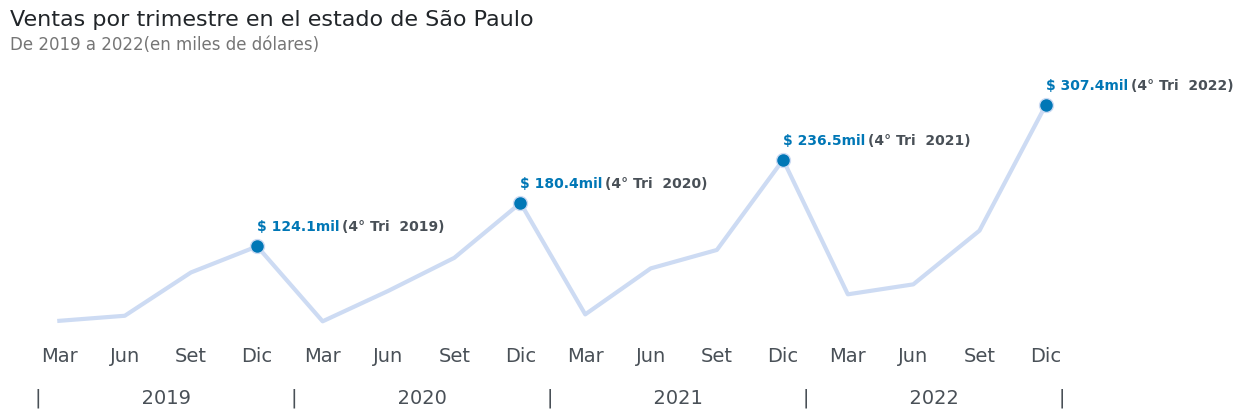

In [ ]:
fig, ax = plt.subplots(figsize=(14,4))
puntos_a_marcar=[False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True]
#otra forma
#puntos_a_marcar=[True if mes==12 else False for mes in df_ventas_sp["fecha_pedido"].dt.month]#

#Crear gráfico
ax.plot(df_ventas_sp["fecha_pedido"], df_ventas_sp["total_venta"], lw=3, marker="o",markevery=puntos_a_marcar, markersize=10, color="#CDDBF3", markerfacecolor="#0077b6")

#Agregar título al grafico
ax.set_title('Ventas por trimestre en el estado de São Paulo',fontsize = 16, color="#212529", loc="left")
#Subtitulo
ax.text(0, 0.95, "De 2019 a 2022(en miles de dólares)", transform=ax.transAxes, color="#757575", fontsize = 12)

#Definiendo intervalo en trimestres y colocando nombres de mes en labels:
#Para reemplazar las fechas en el ejeX por su nombre del mes:
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
x_labels = ["Mar", "Jun", "Set", "Dic"] * 4
ax.set_xticks(df_ventas_sp.fecha_pedido)
ax.set_xticklabels(x_labels, ha="center")
#Ajustando el eje X colocando un nivel encima de la granularidad por medio de la exposición del año
texto=[16*" "+str(i) +16*" " for i in range(2019,2023)]
ax.text(ax.get_xbound()[0] +35, -80, f'|{texto[0]}|{texto[1]}|{texto[2]}|{texto[3]}|', fontsize=14, color="#495057")

#Para colocar valores sólo en el 4to Trimestre:
año=0
for i in range(3, len(df_ventas_sp["total_venta"]), 4):
  ax.text(x=ax.get_xticks()[i], y = df_ventas_sp["total_venta"][i]+20, s=f'$ {df_ventas_sp["total_venta"][i].round(1)}mil', color="#0077b6", weight="bold", fontsize=10)
  ax.text(x=ax.get_xticks()[i]+ 118, y = df_ventas_sp["total_venta"][i]+ 20, s= f"(4° Tri  {2019 + año})", color="#495057",  weight="bold", fontsize=10)
  año+=1

#Destacando los valores del 4to trimestre
año=0



# #Eliminar la visualización del marco del gráfico , y del eje en Y
ax.set_frame_on(False)
ax.get_yaxis().set_visible(False)
#Otra forma
# ax.set_xlabel('')
# ax.set_ylabel('')
# ax.set_yticklabels([])
# ax.set_yticks([])
# ax.yaxis.grid(False)
# ax.xaxis.grid(False)

#set para etiquetas en eje X.
ax.xaxis.set_tick_params(labelsize=14, labelcolor="#495057")
ax.tick_params(axis="both", which="both", length=0)

plt.ylim(0,400)
plt.show()
